<a href="https://colab.research.google.com/github/tulashiprasad/pytorch/blob/main/03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch computer vision

## 0. Computer Vission libraries in PyTorch

* `torchvision` ---- base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data(images) to be suitable for use with an ML model
* `torch.utils.data.Datasets` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` -  Create a python iterable over a dataset  

In [3]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

#Check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST. form torchvision.datasets


In [4]:
# Setup training and testing data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # how do we and to transform the data ?
    target_transform=None # how do we wnat to transform labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 226kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.25MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 19.3MB/s]


In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# See the first training example
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
# check the dape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, weight]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, weight]
Image label: Ankle boot


## 1.2 Visualzing data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

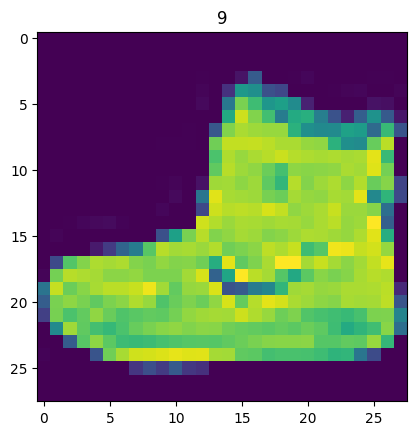

In [11]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

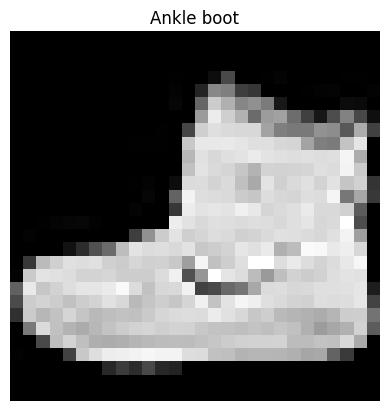

In [12]:
# Plot the image in grayscale
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False) # hides the axes

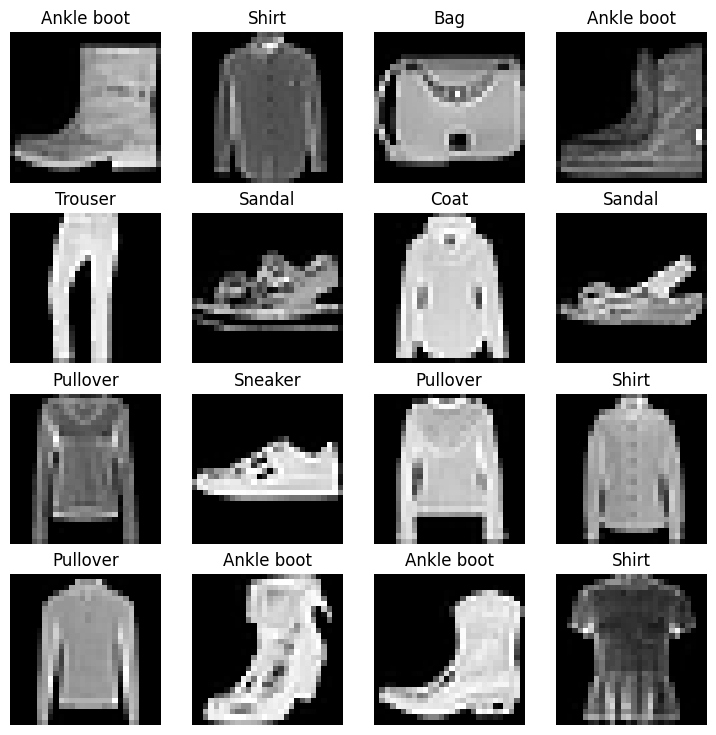

In [13]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


## Prepare DataLoader

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

In [14]:
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True )# shuffle data every epoch)

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

# Let's check what we have created

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} baches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} baches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x78a109644d50>, <torch.utils.data.dataloader.DataLoader object at 0x78a1096f3dd0>)
Length of train dataloader: 1875 baches of 32
Length of test dataloader: 313 baches of 32


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # This creates an iterator over the train_dataloader ang gets the first batch from train_dataloader
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

We can see that the data remains unchanged by checking a single sample

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


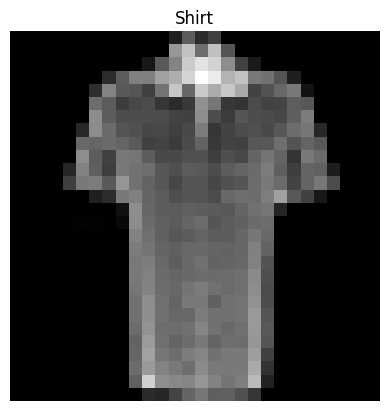

In [16]:
# Show a sample

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3. Build baseline model


In [17]:
# Crate a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print what happened
print(f"Shape before flattening: {x.shape}, [color_channes, height, width]")
print(f"Shape after flattening: {output.shape}, [color_channels, height * width]")


Shape before flattening: torch.Size([1, 28, 28]), [color_channes, height, width]
Shape after flattening: torch.Size([1, 784]), [color_channels, height * width]


We flattened the data to convert it into one long feature vector and `nn.Linear()` layers like inputs to be in the form of feature vectors

In [18]:
# Now let's create our model
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_sape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_sape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)


### Lets create an instance of the model

In [19]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_sape=28 * 28,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
pred = model_0(image.to("cpu"))
print(pred)

tensor([[-0.2146,  0.4067,  0.2567, -0.0543,  0.3899,  0.0015,  0.4777,  0.4481,
         -0.1712,  0.0063]], grad_fn=<AddmmBackward0>)


## Setup loss, optimizer and evaluation metrics

In [21]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")

else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [22]:
# Import accuracy metric
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## Creating a function to time our experiments

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

## Creating training loop and training a model on baches of data
1. Loop through eopchs
2. Loop through training batches, perform training steps, calcualte train loss per batch
3. Loop throuth testing batches, perform testing steps, calcualte test loss per batch
4. Print what's happening
5. Time it all

In [24]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs ( we'll keep this small for faster training time for expterimentation)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n-----")
  ### Training
  train_loss = 0
  # Add a loop to loop throught training batches
  for batch, (X_train, y_train) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X_train)
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    train_loss += loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # print out how many samples have we seen

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X_train)}/{len(train_dataloader.dataset)}")

  # average loss per batch per epoch
  train_loss / len(train_dataloader)

  ### Testing

  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calcualte the accuracy

      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss = test_loss / len(test_dataloader)

    test_acc = test_acc / len(test_dataloader)

  # Print what's happening

  print(f"\nTrain loss: {train_loss: .5f} | Test Loss: {test_loss: .5f} | Test acc: {test_acc: .5f}")
  train_time_end_model_0 = timer()


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss:  1106.97986 | Test Loss:  0.50954 | Test acc:  82.03874
Epoch: 1 
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss:  893.12244 | Test Loss:  0.47989 | Test acc:  83.19688
Epoch: 2 
-----
Looked at 0/60000
Looked at 12800/60000
Looked at 25600/60000
Looked at 38400/60000
Looked at 51200/60000

Train loss:  853.18744 | Test Loss:  0.47664 | Test acc:  83.42652


In [25]:
len(train_dataloader.dataset)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


## Make predictions and get model 0 results

In [26]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

  loss, acc = 0, 0
  model.eval()
  print(device)
  model.to(device)
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # Make predictions with model
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Find loss and accuracy per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works if model is created using class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate the model_0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

cpu


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Setup device agnostic code

In [27]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Building a better model with non linearity

In [28]:
# Create a model with non linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape: int, hidden_layers: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_layers),
      nn.ReLU(),
      nn.Linear(in_features=hidden_layers, out_features=output_shape),
      nn.ReLU()
    )

  def forward(self, x: torch.tensor):
    return self.layer_stack(x)

In [29]:
# Instantiate the model

model_1 = FashionMNISTModelV1(
    input_shape=28*28,
    hidden_layers=10,
    output_shape=len(class_names)
).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [30]:
# setup loss function, optimizer and evaluation metrices
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

## Functionizing training and testing loops

In [31]:
device

'cpu'

In [32]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accruracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0, 0
  model.to(device)

  for batch, (X, y) in enumerate(data_loader):
    # send data to device
    X, y = X.to(device), y.to(device)
    model.train()

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculae the loss and accuracy
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


  # Calculate the loss and accuracy per epoch and print what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train Loss: {train_loss: .5f} | Train Acc: {train_acc: .5f}\n")


def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to device
      X, y= X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate the loss
      test_loss += loss_fn(y_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # convert logits to pred labels

    # Calculate the average test loss nd average test accuracy and print what's happening
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f" Test Loss: {test_loss: .5f} | Test Acc: {test_acc: .5f}\n")


In [33]:
# Let's time things to see how long it takes to run code in GPU
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
epochs = 1

for epoch in range(epochs):
  print(f"Epoch: {epoch} \n -------------------------")
  train_step(
      model=model_1,
      data_loader=train_dataloader,
      loss_fn= loss_fn,
      optimizer=optimizer,
      accruracy_fn=accuracy_fn
  )

  test_step(
      model=model_1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn
  )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_gpu, device=device)

Epoch: 0 
 -------------------------
Train Loss:  0.92895 | Train Acc:  70.44000

 Test Loss:  0.54209 | Test Acc:  80.53115

Train time on cpu:  38.090 seconds


## Evaluate the model

In [34]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

cpu


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.5420900583267212,
 'model_acc': 80.53115015974441}

In [35]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Convolutional Neural Network(CNN)
CNN's are also known as ConvNets

CNN's are known for their capabilities to find pattern in visual data

**CNN EXPLAINER** great website to learn CNN

The typical structure of CNN is:

`Input layer -> [Convolutional Layer -> activation Layer -> Pooling Layer] -> Output Layer`

In [36]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecutre that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_layers: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_layers, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layers, out_channels=hidden_layers, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) # By default stride size is same as kernel size
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layers, out_channels=hidden_layers, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layers, out_channels=hidden_layers, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_layers * 7 * 7, out_features=output_shape)
    )

  def forward(self, x: torch.tensor):
    x = self.block_1(x)
    # print(x.shape)
    x = self.block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

model_2 = FashionMNISTModelV2(input_shape=1, hidden_layers=10, output_shape=len(class_names)).to(device) # here input_hape is the number of color channels presetnt in the image, if its rgb iamge its value shoild be 3, sinde we are using gray scale image it's value is 1
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Setpping through `nn.Conv2d()`

For more information(it is explained beautifully): https://www.youtube.com/watch?v=V_xro1bcAuA&t=63706s



In [37]:
torch.manual_seed(42)
# create sample abtch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
sample_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape}")
print(f"Test image shape: {image.shape}")
# print(f"Test image pixel values: {image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Test image shape: torch.Size([1, 28, 28])


In [38]:
#  create a convolutional layer with same dimentions as TinyVGG

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
# Pass the data through conv layer
conv_layer(sample_image).shape

torch.Size([10, 62, 62])

## Stepping through `nn.axPool2d()`

In [39]:
print(f"Test image shape {sample_image.shape}")

# Create a max pool layer
max_pool_laye = nn.MaxPool2d(kernel_size=2)

# Pass data through conv layer
image_through_conv_layer = conv_layer(sample_image)

# Pass data through masx pool layer
image_through_conv_layer_and_maxpool_layer = max_pool_laye(image_through_conv_layer)
print(f"shape after passing through conv layer and max pool layer: {image_through_conv_layer_and_maxpool_layer.shape}")

Test image shape torch.Size([3, 64, 64])
shape after passing through conv layer and max pool layer: torch.Size([10, 31, 31])


## Setup Loss function and optimizer

In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

## Training and testing model_2

In [41]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train the model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"{epoch}\n-----------")
  train_step(data_loader=train_dataloader,
             model=model_2,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accruracy_fn =accuracy_fn,
             device=device)

  test_step(data_loader=test_dataloader,
            model=model_2,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2, end=train_time_end_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

0
-----------
Train Loss:  0.75836 | Train Acc:  71.97500

 Test Loss:  0.40546 | Test Acc:  85.72284

1
-----------
Train Loss:  0.37443 | Train Acc:  86.56000

 Test Loss:  0.36190 | Test Acc:  87.16054

2
-----------
Train Loss:  0.33626 | Train Acc:  87.85667

 Test Loss:  0.33325 | Test Acc:  87.83946

Train time on cpu:  138.736 seconds


## Evaluate the model

In [42]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

cpu


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3332502543926239,
 'model_acc': 87.83945686900958}

## Compare results and training time


In [43]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.542090,80.531150
2,FashionMNISTModelV2,0.333250,87.839457


In [44]:
# Add training time to results comparison
compare_results["training_time"] = [0.0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,0.000000
1,FashionMNISTModelV1,0.542090,80.531150,38.089657
2,FashionMNISTModelV2,0.333250,87.839457,138.736114


## Visualize the data

Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'model')

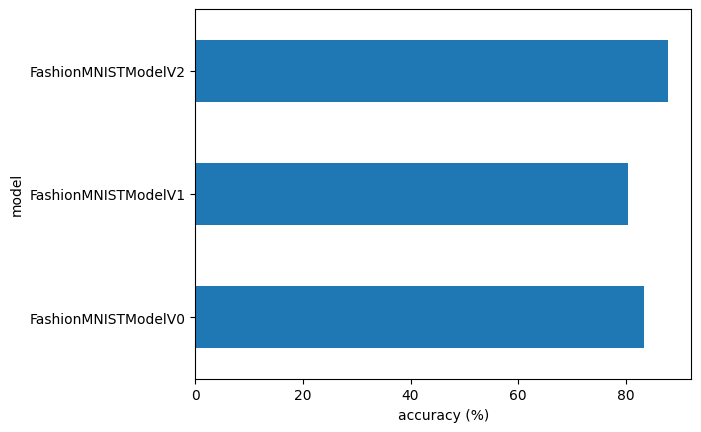

In [45]:
print(compare_results.set_index("model_name")["model_acc"].plot(kind="barh"))
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## Make and evaluate random predictions with best model(crated using CNN)

In [46]:
# Create a make_predictions functions to predict

def make_predictions(model: torch.nn.Module, data: list, device: torch.device=device):
  pred_probs = []
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # prepare sample
      sample=torch.unsqueeze(sample, dim=0).to(device) # add an extra dimension and send sample to device
      # Forward pass
      pred_logit = model(sample)

      # Get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred prob off  GPU for further calculations
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [47]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first test sample shape and label

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [48]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples, device=device)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[6.6219e-08, 1.2213e-09, 4.5626e-07, 6.9991e-07, 3.5880e-08, 9.9989e-01,
         2.8086e-06, 5.6624e-06, 2.7869e-05, 7.2414e-05],
        [1.4839e-01, 4.9148e-01, 3.3154e-03, 1.3729e-01, 8.3841e-02, 6.6882e-04,
         1.2959e-01, 1.7074e-03, 3.1004e-03, 6.2884e-04]])

In [49]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[6.6219e-08, 1.2213e-09, 4.5626e-07, 6.9991e-07, 3.5880e-08, 9.9989e-01,
         2.8086e-06, 5.6624e-06, 2.7869e-05, 7.2414e-05],
        [1.4839e-01, 4.9148e-01, 3.3154e-03, 1.3729e-01, 8.3841e-02, 6.6882e-04,
         1.2959e-01, 1.7074e-03, 3.1004e-03, 6.2884e-04]])

In [50]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

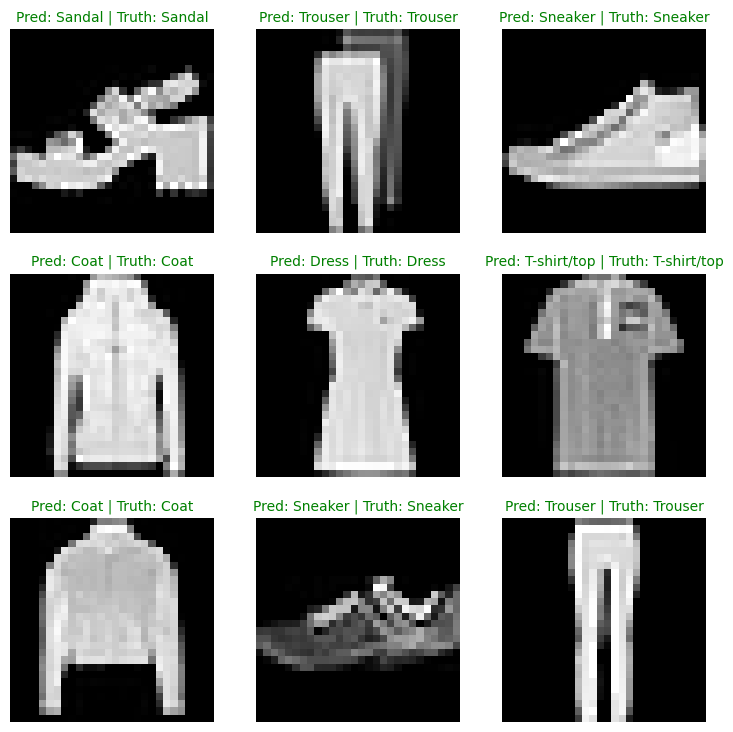

In [51]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"


  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## Making a confusion matrix for further prediction evaluation

### Steps to go through to make a confusion matrix
1. Make predictinos with our trained model(a confusion matrix compares predictions to true labels)
2. Make a confusion matrix using `torchmeterices.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [52]:
# Let's make predictions
from tqdm.auto import tqdm

y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making predictions'):
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logit =model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [53]:
# See if torchmetrics exists, if not, install it
# try:
#     import torchmetrics, mlxtend
#     print(f"mlxtend version: {mlxtend.__version__}")
#     assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
# except:
#     !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
#     import torchmetrics, mlxtend
#     print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 832.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.6 MB/s eta 0:00:00
mlxtend version: 0.23.4


## Create confusion matrix and plot it

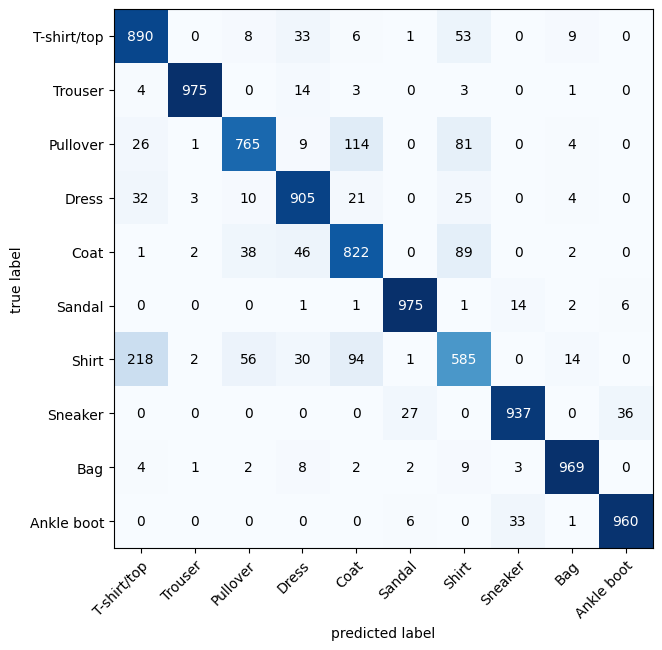

In [55]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# confmat_tensor

# Plot the confusion matrix
fit, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)